In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" 

# 1. GET THE DATA

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)  #create data directory
    tgz_path = os.path.join(housing_path, 'housing.tgz') #assign the data file path
    urllib.request.urlretrieve(housing_url, tgz_path)  #download the data from housing_url and then save to tgz_path
    housing_tgz = tarfile.open(tgz_path) #open the tgz file
    housing_tgz.extractall(path=housing_path) #then extract all the files in the tgz file
    housing_tgz.close

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

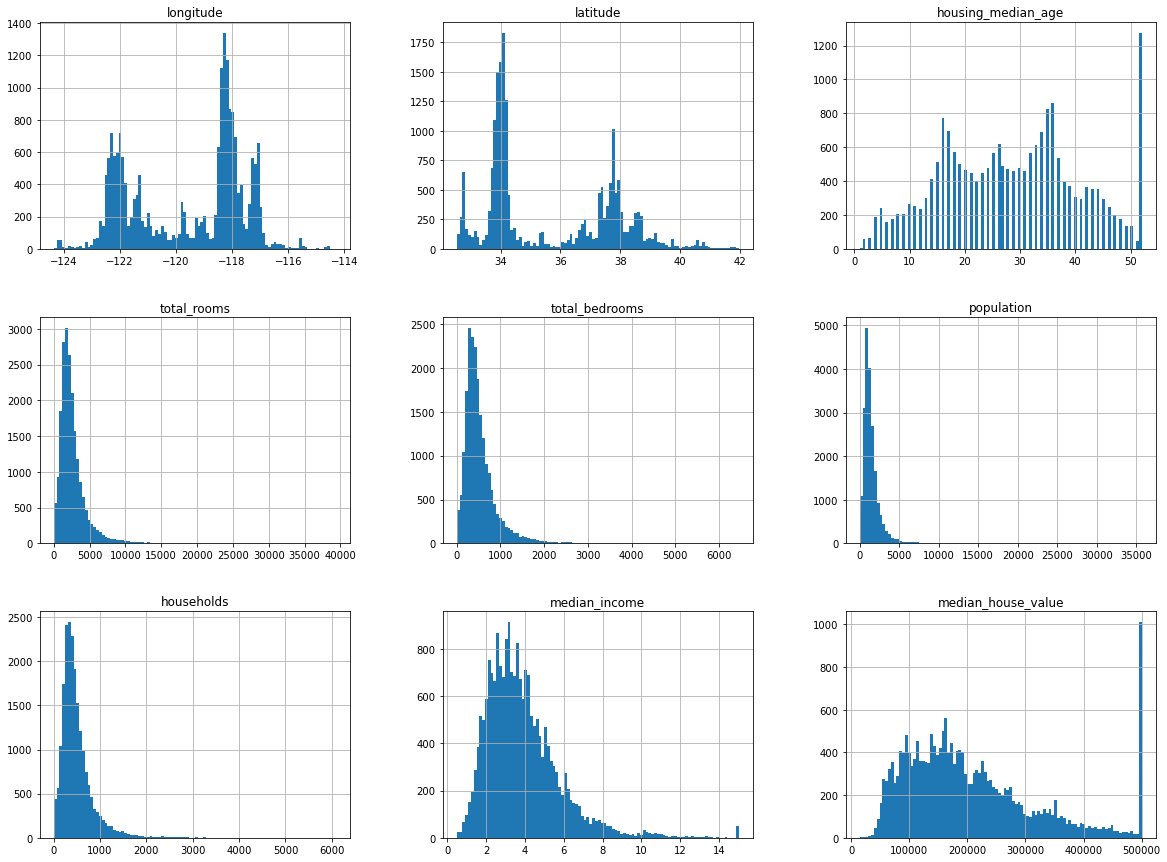

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))

plt.show()

<AxesSubplot:>

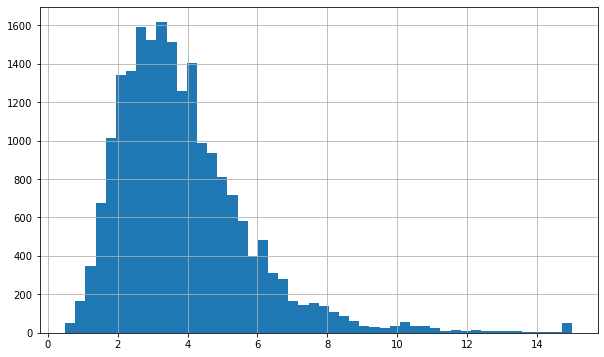

In [10]:
housing['median_income'].hist(bins=50, figsize=(10,6))

<AxesSubplot:>

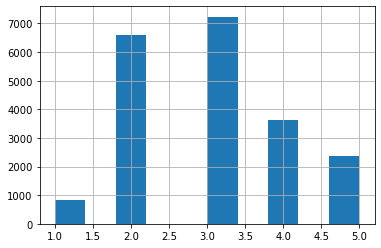

In [11]:
import numpy as np
#if the median income is an important attribute, we should split the train/test data following the ratio in the value of media_income
housing['income_cat'] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()
#in the histogram below, the median income is categorized in 5 categories. 
    # category 1: 0 <= median income < 1.5
    # category 2: 1.5 <= median income < 3.0
    #......
    # category 5: 6.0 <= median income



In [12]:
# Then we will split the train/test set, but still remaining the ratio of all the categories of the median income in both train/test set 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)   #train/test set ratio = 0.8/0.2

for train_index, test_index in split.split(housing, housing["income_cat"]):
    #print(train_index, test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


# 2. Discover and Visualize the Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

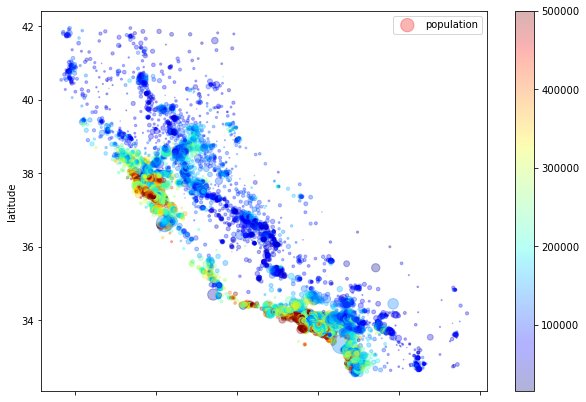

In [13]:
housing.plot.scatter(x='longitude', y='latitude', alpha=0.3,
                    s=housing["population"]/100, label='population', figsize=(10,7),
                    c=housing['median_house_value'], cmap=plt.get_cmap("jet"), colorbar=True
                    )

In [14]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

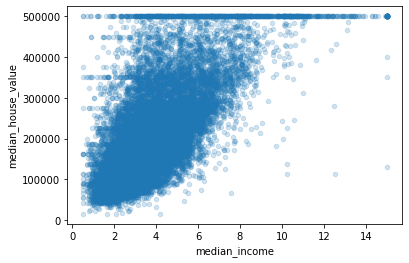

In [15]:
#plot the relationship between the most correlated attributes of the median_house_value with its own
housing.plot.scatter(x='median_income', y='median_house_value',alpha=0.2)

# 3. Prepare the Data For Machine Learning Algorithm

In [16]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [20]:
from sklearn.impute import SimpleImputer

#1. call the estimator
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop("ocean_proximity", axis=1)
#2.fit the estimator to the data set
imputer.fit(housing_num)
#3. transform the data set
X = imputer.transform(housing_num)
#4 make a new data set from the transformed dataset
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [21]:
# we need to use BaseEstimator and TransformerMixin to make a custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

#total rooms, total bedrooms, population, households
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),  
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# 4. Select and Train a Model

In [33]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

In [34]:
from sklearn.metrics import mean_squared_error
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118451.153930123

In [35]:
#Using K-fold cross-validation
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)

svm_rmse_scores = np.sqrt(-svm_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(svm_rmse_scores)

Scores: [116628.19183878 119988.26365356 113823.78366263 120271.03189229
 114581.92489539 122665.05912251 119753.16461411 118174.92428728
 120129.13952467 118707.9580594 ]
Mean: 118472.3441550637
Standard deviation: 2603.593039791196


# 5. Fine-tune the model

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C':[10., 30., 100., 300., 1000.]},
    {'kernel': ['rbf'], 'C':[1.0, 3.0, 10., 30., 100., 300.],
    'gamma' : [0.01, 0.1, 1.0, 3.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.5s
[CV] END .............................C=100.0, kernel=linear; total time=   5.5s
[CV] END .............................C=100.0, 

[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=   9.0s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=   9.0s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=   9.0s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=   9.0s
[CV] END ....................C=100.0, gamma=0.01, kernel=rbf; total time=   9.4s
[CV] END ....................C=100.0, gamma=0.01, kernel=rbf; total time=   9.5s
[CV] END ....................C=100.0, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END ....................C=100.0, gamma=0.01, kernel=rbf; total time=   9.4s
[CV] END ....................C=100.0, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END .....................C=100.0, gamma=0.1, kernel=rbf; total time=   9.2s
[CV] END .....................C=100.0, gamma=0.1, kernel=rbf; total time=   9.2s
[CV] END .....................C=100.0, gamma=0.1, kernel=rbf; total time=   9.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0],
                          'gamma': [0.01, 0.1, 1.0, 3.0], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
print(rmse)
grid_search.best_params_

70279.30953796023


{'C': 1000.0, 'kernel': 'linear'}

### Q2: Try replacing GridSearchCV with RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C': reciprocal(20, 200000), 
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, 
                               n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                               verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.5s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   9.0s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   9.0s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   8.9s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.6s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.5s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.5s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.6s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.6s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.5min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.4min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.2min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   6.0s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.3s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.2s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.1s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   5.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000198E37B4D60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000198E37A93D0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Q3: Add a transformer in the preparation pipeline to select only the most important attributes

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importantces = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
    

In [56]:
# let's define the number of top features we want to keep 
k = 5

# feature_importances is found from the grid search function # here we asume that we already know the feature_importances array
feature_importances = grid_search.best_estimator_.feature_importances_

# Now look for the indices of the top k features
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2437281550348665, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836558, 'INLAND'),
 (0.10060150315157557, 'pop_per_hhold'),
 (0.0676445808532661, 'longitude')]

### Q4: Creating a single pipeline that does the full data preparation plus the final prediction

In [71]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeaturesSelector(feature_importances,k)), 
    ('svm_reg', SVR(**rnd_search.best_params_))
])


In [72]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

AttributeError: 'TopFeaturesSelector' object has no attribute 'feature_importances'

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

### Q5" Automatically explore some preparation options using GridSearchCV


In [ ]:
full_pipeline.named_transformer_["cat"].handle_unknown='ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_